In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [ ]:
df = pd.read_csv(r"/content/muishroom.c.csv")

In [ ]:
print(df)

     class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n

In [ ]:
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.shape

(8124, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8119    False
8120    False
8121    False
8122    False
8123    False
Length: 8124, dtype: bool

In [ ]:
f=df['class']
d=df.drop('class',axis=1)

In [ ]:
print(d)

     cap-shape cap-surface cap-color bruises odor gill-attachment  \
0            x           s         n       t    p               f   
1            x           s         y       t    a               f   
2            b           s         w       t    l               f   
3            x           y         w       t    p               f   
4            x           s         g       f    n               f   
...        ...         ...       ...     ...  ...             ...   
8119         k           s         n       f    n               a   
8120         x           s         n       f    n               a   
8121         f           s         n       f    n               a   
8122         k           y         n       f    y               f   
8123         x           s         n       f    n               a   

     gill-spacing gill-size gill-color stalk-shape  ...  \
0               c         n          k           e  ...   
1               c         b          k           e  .

In [ ]:
def bar_chart(feature):
    poisonous = df[df['class'] == "p"][feature].value_counts()
    edible = df[df['class'] == "e"][feature].value_counts()
    dff = pd.DataFrame([poisonous, edible])
    dff.index = ['poisonous', 'edible']
    ax = dff.plot(kind='bar', stacked=True, figsize=(10, 5))
    ax.set_title(feature)

In [ ]:
def pie_chart(feature):
    poisonous = df[df['class'] == "p"][feature].value_counts()
    edible = df[df['class'] == "e"][feature].value_counts()
    dff = pd.DataFrame([poisonous, edible])
    dff.index = ['poisonous', 'edible']
    ax = dff.T.plot(kind='pie', subplots=True, figsize=(10, 5))
    ax[0].set_title(feature)


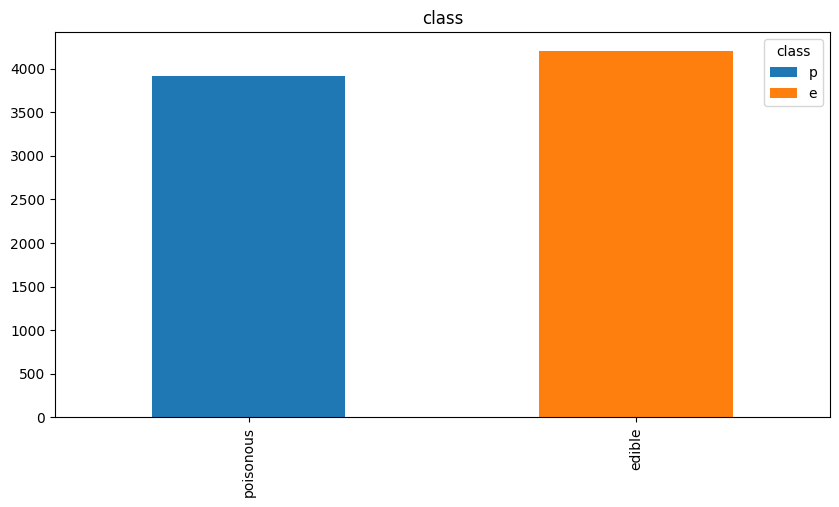

In [ ]:
bar_chart("class")

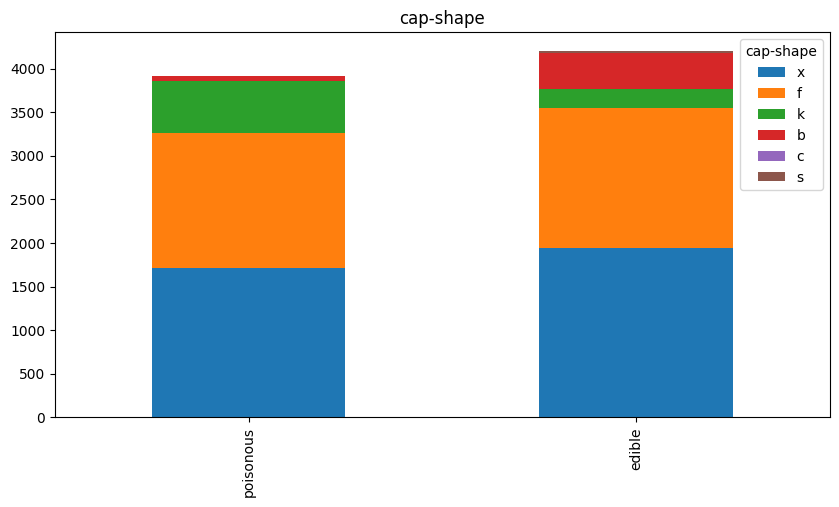

In [ ]:
bar_chart('cap-shape')

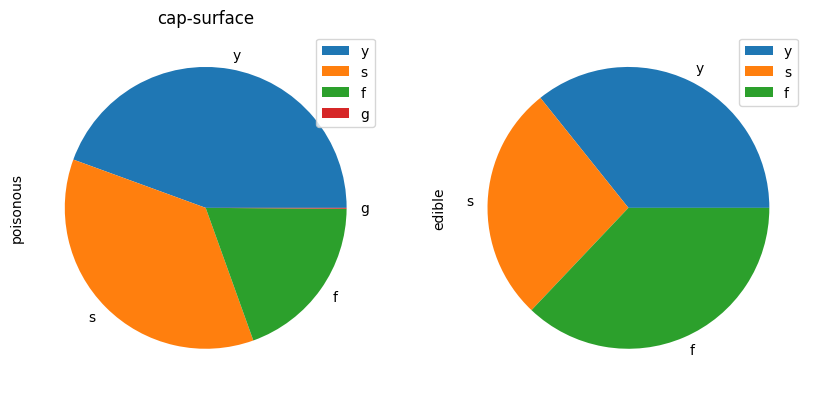

In [ ]:
pie_chart('cap-surface')

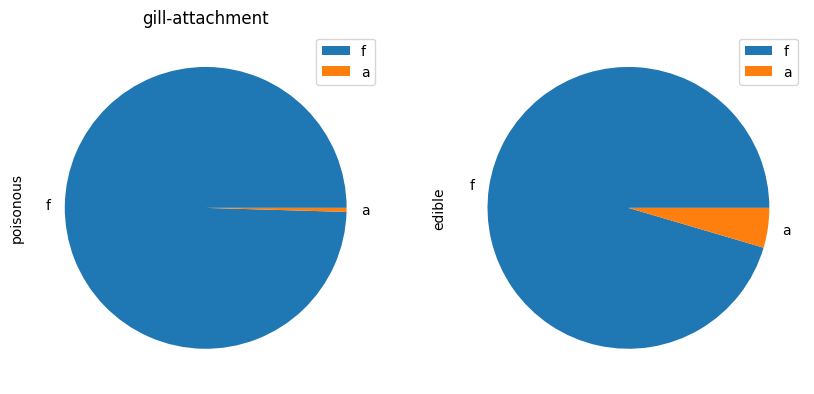

In [ ]:
pie_chart('gill-attachment')

In [ ]:
encoder = LabelEncoder()
for column in df.columns:
    df[column] = encoder.fit_transform(df[column])


In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", int(100*accuracy),"%")

Accuracy: 99 %


In [ ]:
!pip install seaborn

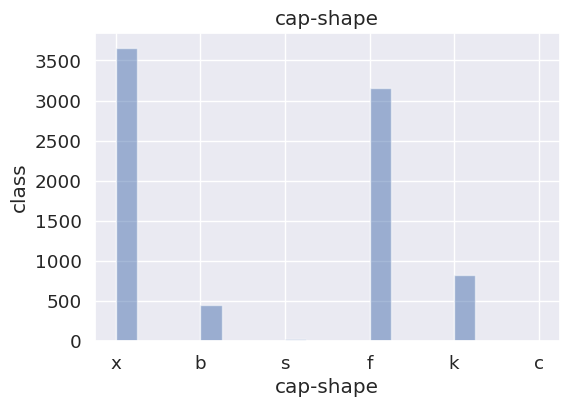

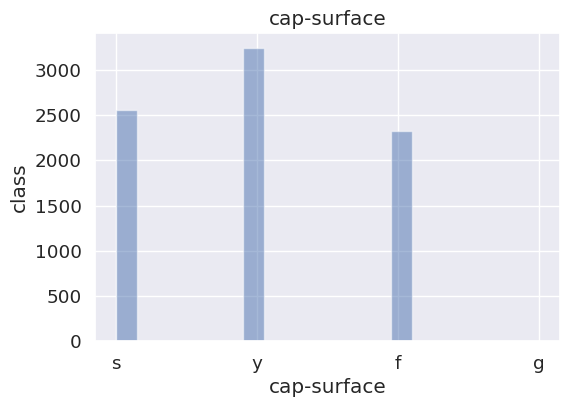

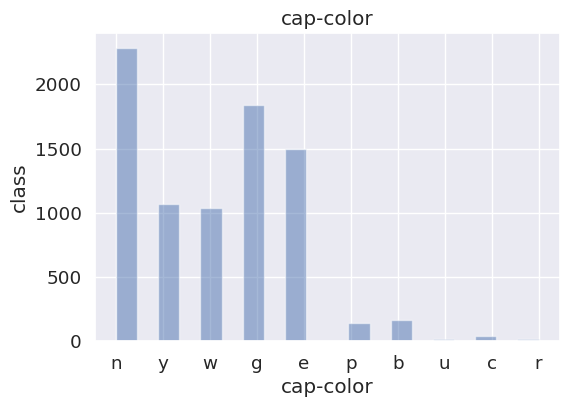

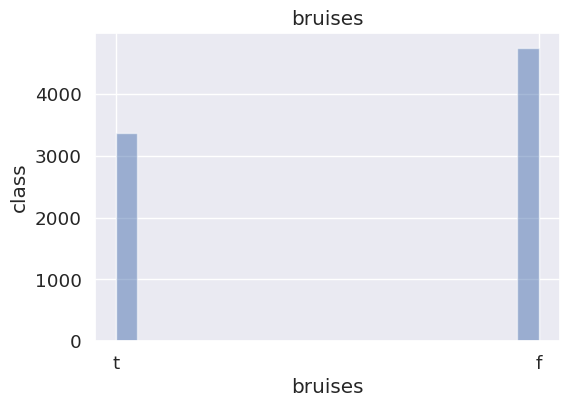

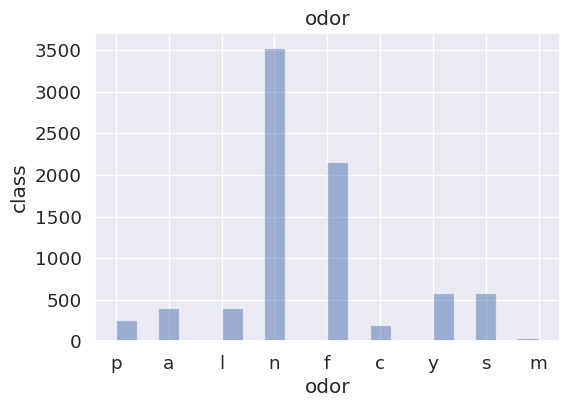

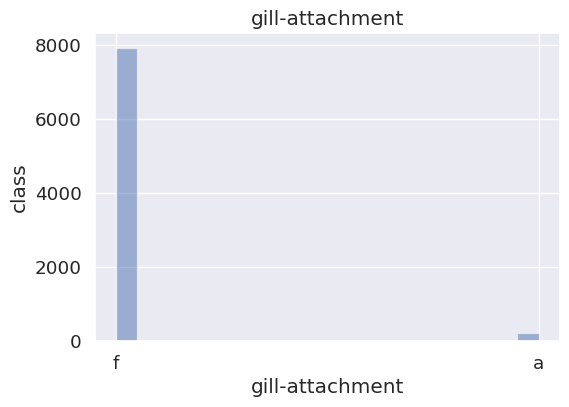

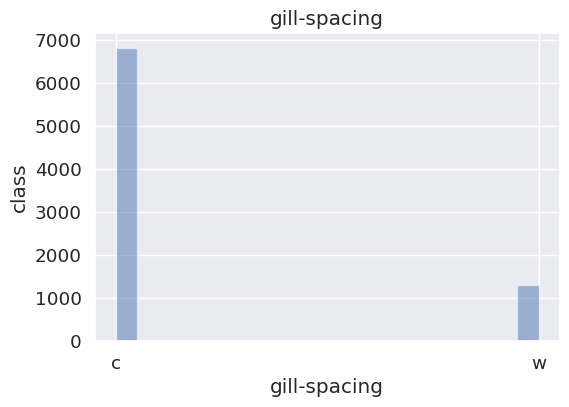

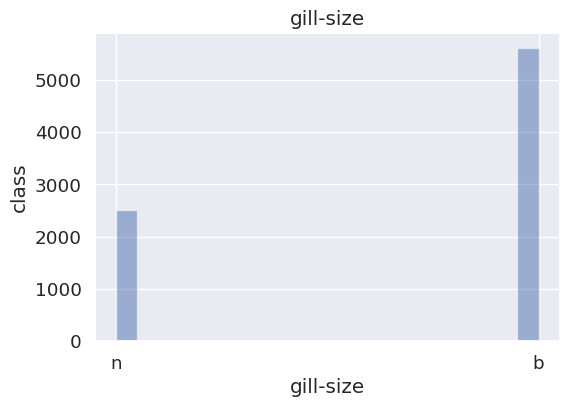

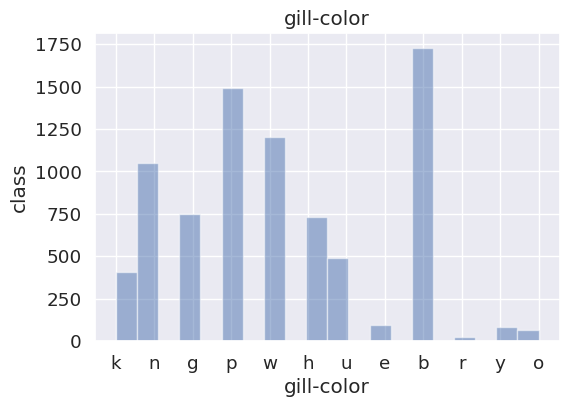

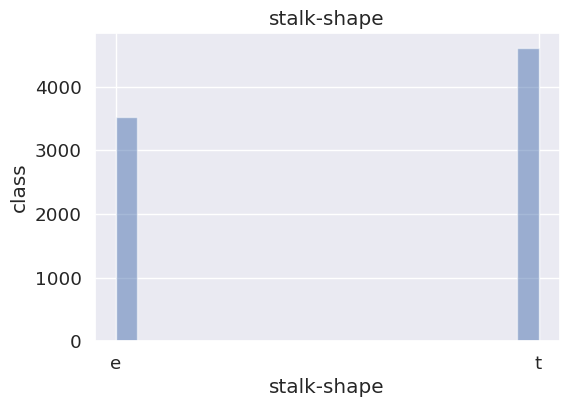

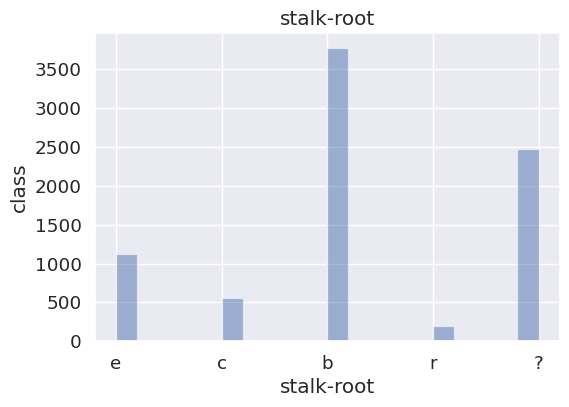

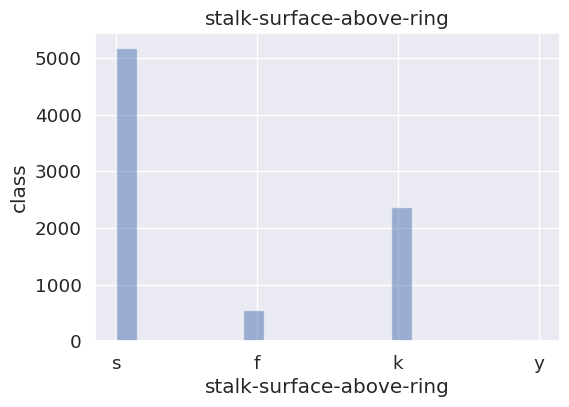

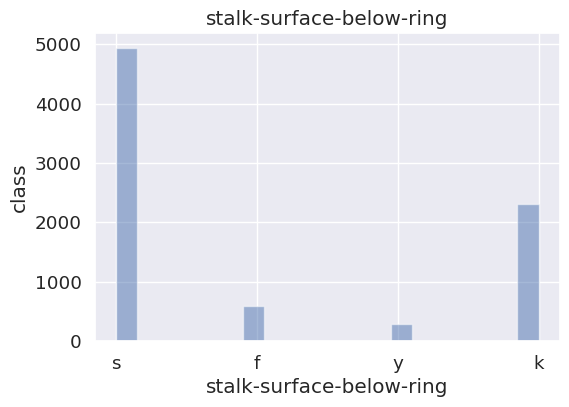

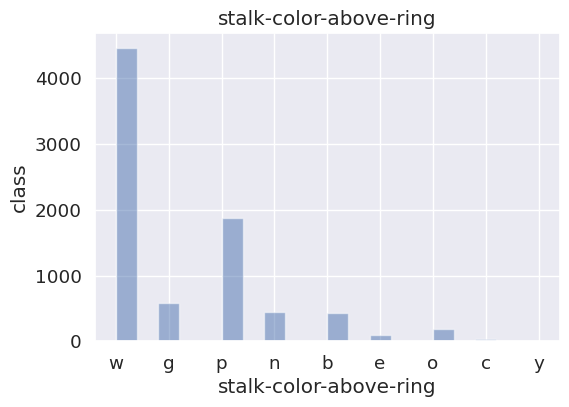

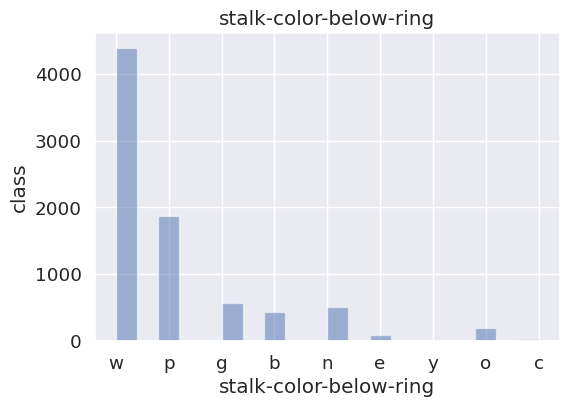

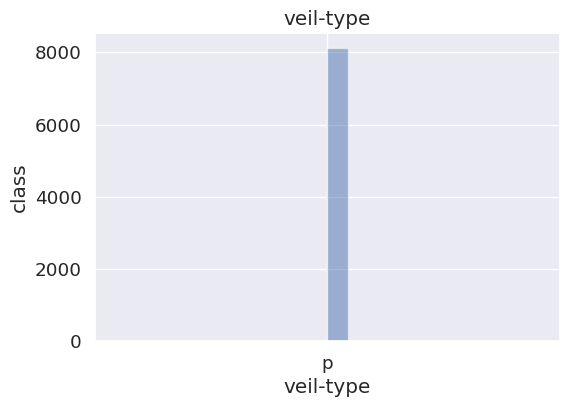

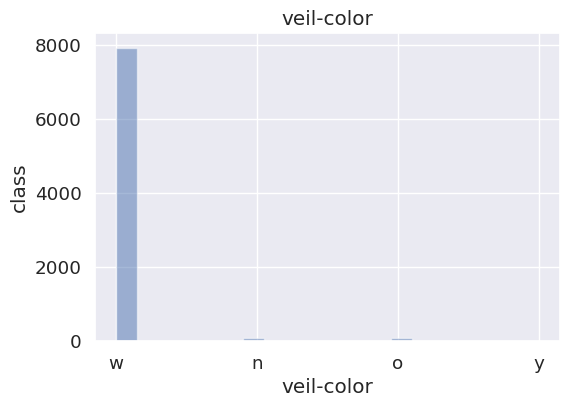

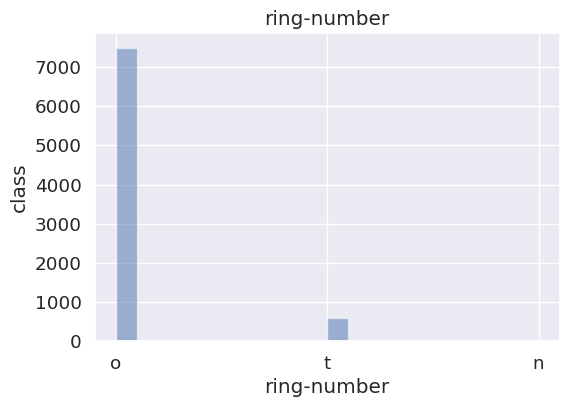

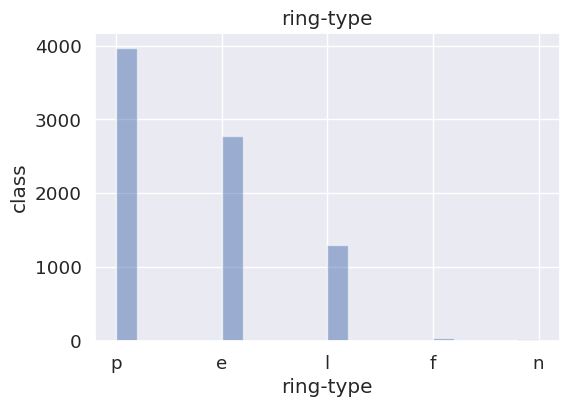

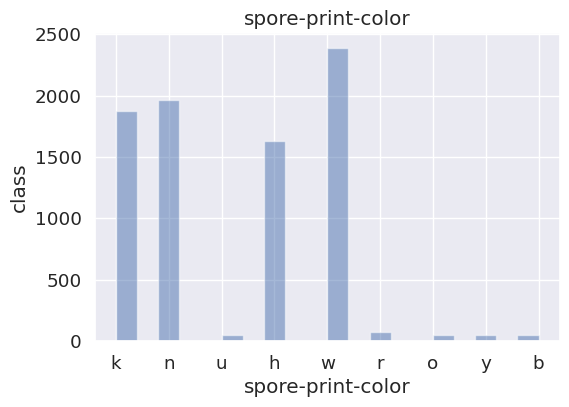

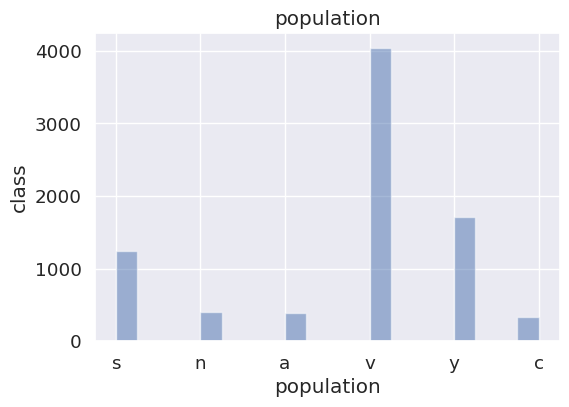

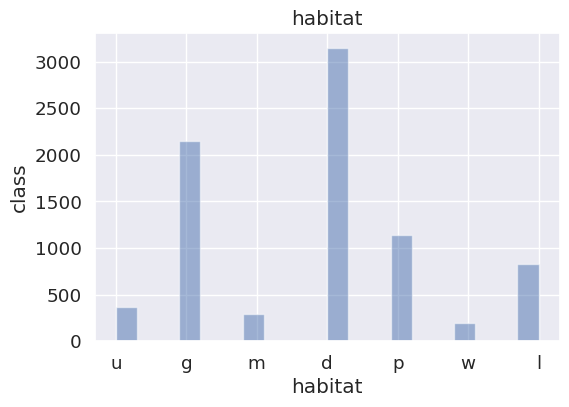

<Figure size 600x400 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
for column in d.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(d[column], bins=20, alpha=0.5)
    plt.xlabel(column)
    plt.ylabel("class")
    plt.title(f"{column}")
    plt.show()
plt.figure(figsize=(6, 4))
plt.show()

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", int(100*accuracy),"%")

Accuracy: 100 %


In [ ]:
g=GaussianNB()
g.fit(X_train,y_train)
y_pred = g.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", int(100*accuracy),"%")

Accuracy: 92 %


Accuracy: 0.9218461538461539
Confusion Matrix:
[[771  72]
 [ 55 727]]


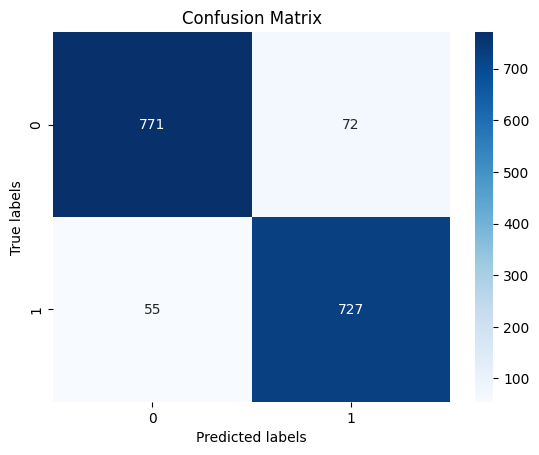

In [ ]:
# Predicting the test set results
y_pred = g.predict(X_test)

# Evaluating the model
accuracy_NB = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_NB)
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

In [ ]:
svm=SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", int(100*accuracy),"%")

Accuracy: 99 %


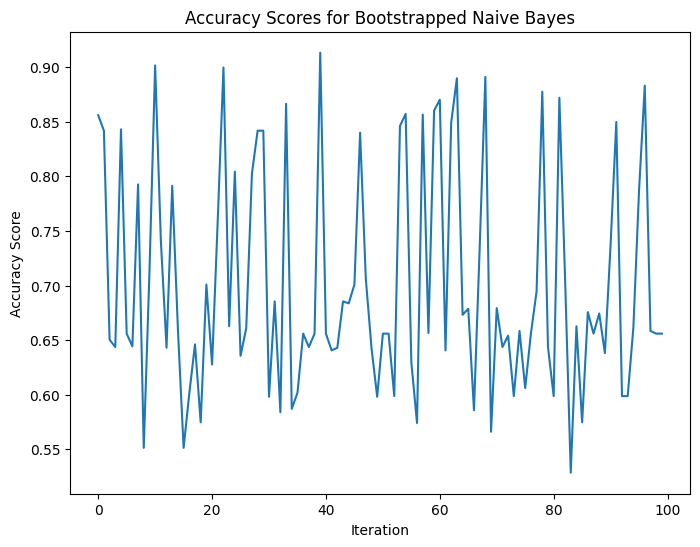

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

n_bootstrap_samples = 50
n_iterations = 100

# Create a Naive Bayes model
model = GaussianNB()

accuracy_scores = []

for _ in range(n_iterations):
    # Resample the training data
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)

    # Fit the Naive Bayes model to resampled data
    model.fit(X_resampled, y_resampled)

    # Predict using the Naive Bayes model on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped Naive Bayes")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 1.0
Accuracy: 1.0
Confusion Matrix:
[[843   0]
 [  0 782]]


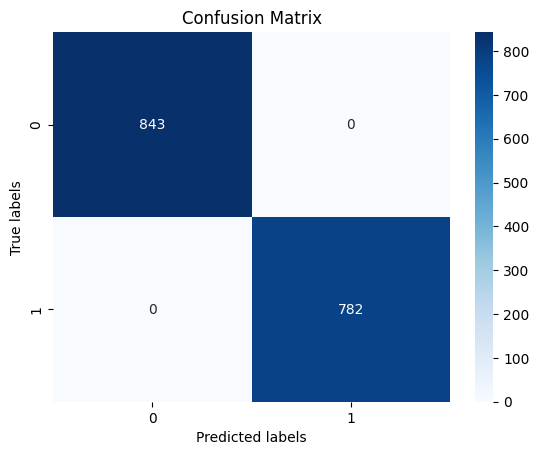

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
# Predict on the test set
y_pred = tree_model.predict(X_test_scaled)

# Evaluation metrics
accuracy_DT= accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_DT)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

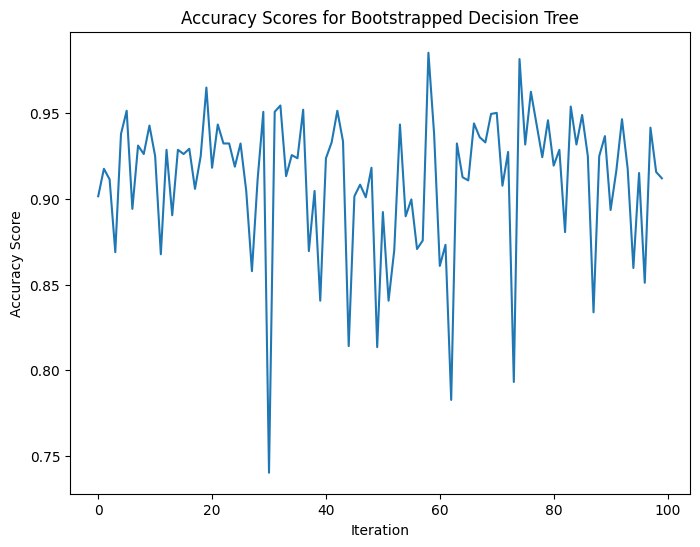

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

n_bootstrap_samples = 50
n_iterations = 100

# Create a Decision Tree model
model = DecisionTreeClassifier()

accuracy_scores = []

for _ in range(n_iterations):
    # Resample the training data
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)

    # Fit the Decision Tree model to resampled data
    model.fit(X_resampled, y_resampled)

    # Predict using the Decision Tree model on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped Decision Tree")
plt.show()

In [ ]:
#multi-layer perceptrons#
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=42)

Accuracy: 1.0
Confusion Matrix:
[[843   0]
 [  0 782]]


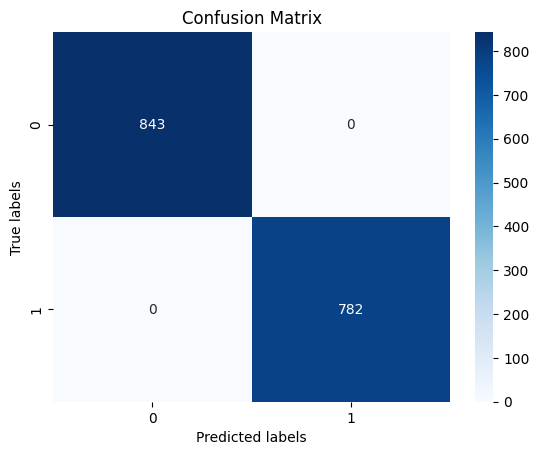

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
# Predictions
y_pred = mlp.predict(X_test)

# Evaluation
accuracy_MLP = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_MLP)
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

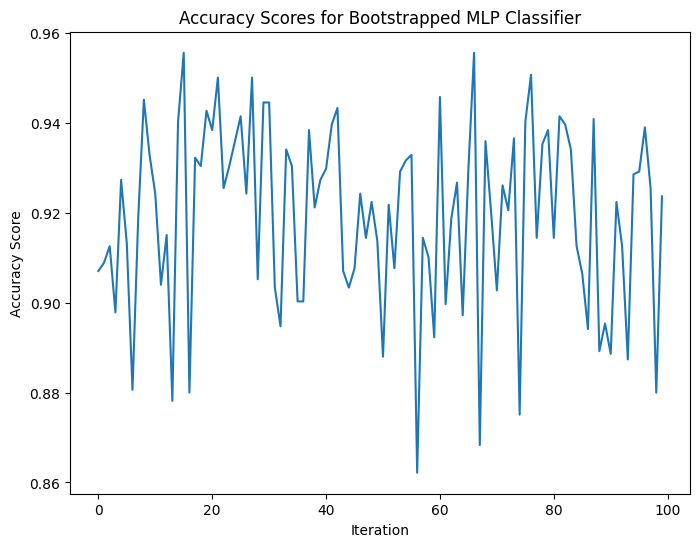

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

n_bootstrap_samples = 50
n_iterations = 100

# Create an MLP classifier model
model = MLPClassifier()

accuracy_scores = []

for _ in range(n_iterations):
    # Resample the training data
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)

    # Fit the MLP classifier model to resampled data
    model.fit(X_resampled, y_resampled)

    # Predict using the MLP classifier model on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped MLP Classifier")
plt.show()


In [ ]:
pip install lightgbm

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Creating LightGBM dataset from the training data
train_data = lgb.Dataset(X_train, label=y_train)

# Setting parameters
# Note: These are basic parameters. LightGBM offers a wide range of parameters that can be tuned for improved performance.
params = {
'objective': 'binary',
'metric': 'binary_logloss',
'boosting': 'gbdt',
'learning_rate': 0.05,
'num_leaves': 31,
'max_depth': -1,
}

# Train the model
gbm = lgb.train(params, train_data, num_boost_round=100)

# Predicting on the test set
y_pred = gbm.predict(X_test)
# Converting probabilities to class labels based on a threshold (0.5)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred]

[LightGBM] [Info] Number of positive: 3134, number of negative: 3365
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 6499, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.482228 -> initscore=-0.071118
[LightGBM] [Info] Start training from score -0.071118
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Accuracy: 1.0
Confusion Matrix:
[[843   0]
 [  0 782]]


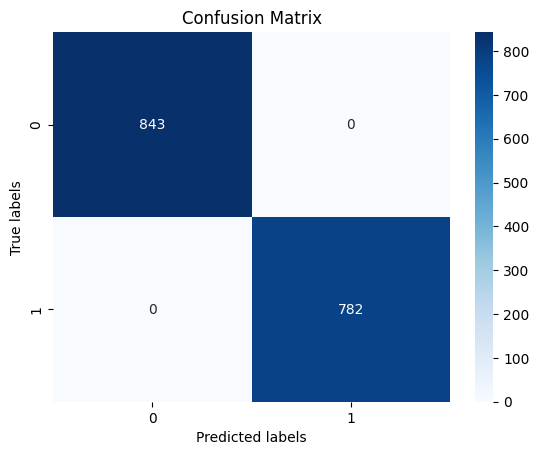

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
# Evaluating the model
accuracy_LGBM = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_LGBM)
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

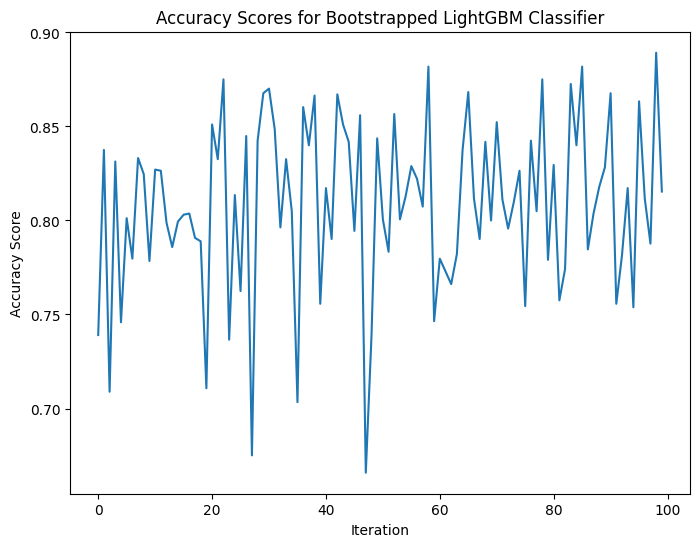

In [ ]:
import lightgbm as lgb
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

n_bootstrap_samples = 50
n_iterations = 100

# Create a LightGBM classifier model
model = lgb.LGBMClassifier()

accuracy_scores = []

for _ in range(n_iterations):
    # Resample the training data
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)

    # Fit the LightGBM classifier model to resampled data
    model.fit(X_resampled, y_resampled)

    # Predict using the LightGBM classifier model on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped LightGBM Classifier")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
import numpy as np
costs_list = []
num_iter = []
# implementation of logistic regression from scratch without any libraries
class Logisticregression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, X, y):
        m = X.shape[0]
        h = self.sigmoid(np.dot(X, self.weights) + self.bias)
        cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        return cost

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.num_iterations):
            h = self.sigmoid(np.dot(X, self.weights) + self.bias)
            dw = (1 / m) * np.dot(X.T, (h - y))
            db = (1 / m) * np.sum(h - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            cost = self.cost_function(X, y)
            self.cost_history.append(cost)
            if i % 100 == 0:
                cost = self.cost_function(X, y)
                print(f"Cost after iteration {i}: {cost}")

        print("",self.cost_history)


    def predict(self, X):
        h = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_pred = np.where(h > 0.5, 1, 0)
        return y_pred


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

model = Logisticregression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)
accuracy_p = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_p)
print(classification_report(y_test, y_pred))

Cost after iteration 0: 0.6886093198465015
Cost after iteration 100: 0.44252145011725397
Cost after iteration 200: 0.35843541906059734
Cost after iteration 300: 0.3177299015161403
Cost after iteration 400: 0.29379394325382063
Cost after iteration 500: 0.27796802973403534
Cost after iteration 600: 0.2666682822778348
Cost after iteration 700: 0.2581539297450821
Cost after iteration 800: 0.2514779698152658
Cost after iteration 900: 0.24608032750188064
 [0.6886093198465015, 0.6841384131463338, 0.6797333666452805, 0.6753930987674865, 0.6711165404798146, 0.6669026355649064, 0.6627503408641511, 0.6586586264918142, 0.6546264760215855, 0.6506528866468048, 0.6467368693156073, 0.6428774488422218, 0.6390736639956405, 0.6353245675668518, 0.6316292264158087, 0.6279867214992785, 0.6243961478806899, 0.6208566147230642, 0.6173672452660849, 0.613927176788325, 0.610535560555622, 0.6071915617565493, 0.6038943594259029, 0.6006431463570793, 0.5974371290041958, 0.5942755273747551, 0.5911575749136313, 0.58808

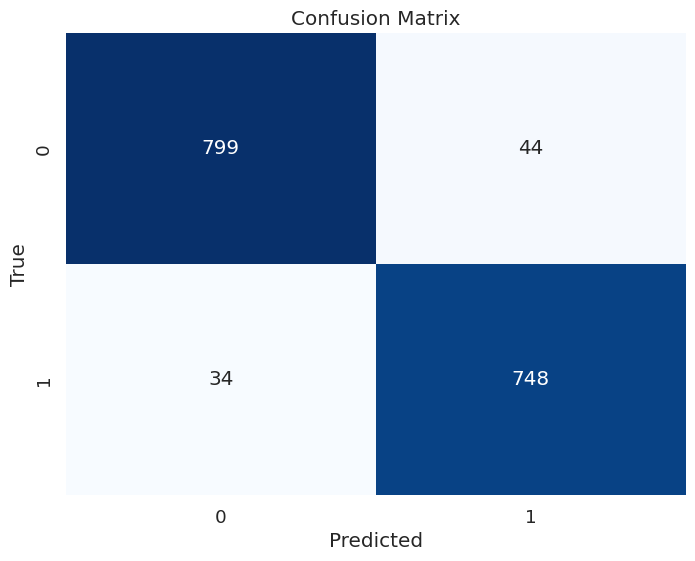

Accuracy is: 0.952
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       843
           1       0.94      0.96      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have defined x_train, y_train, x_test, and y_test somewhere in your code
# Split your data into training and testing sets


# Standardize your features if needed
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for clarity
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
accuracy_LR = accuracy_score(y_test, y_pred)
print("Accuracy is:", accuracy_LR)
print(classification_report(y_test, y_pred))




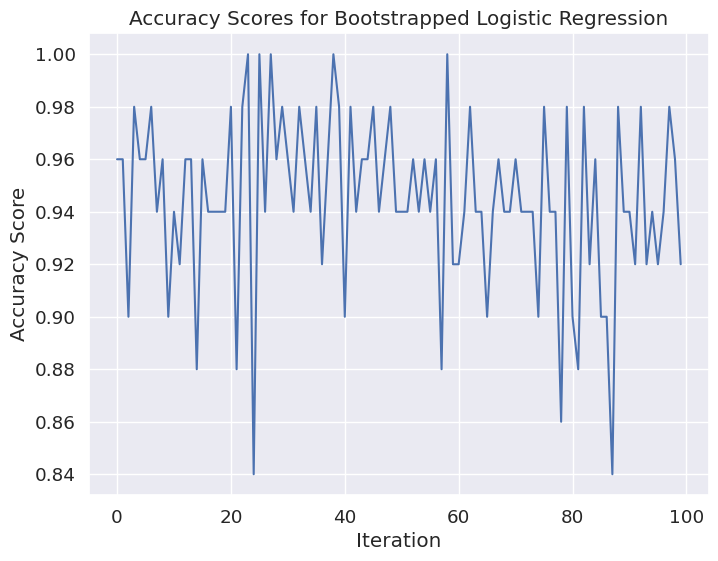

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np

n_bootstrap_samples = 50
n_iterations = 100
model = LogisticRegression()
model.fit(X_test, y_test)

accuracy_scores = []

for _ in range(n_iterations):
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)


    y_p = model.predict(X_resampled)

    accuracy = accuracy_score(y_resampled, y_p)
    accuracy_scores.append(accuracy)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped Logistic Regression")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

model = Logisticregression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)
accuracy_p = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_p)
print(classification_report(y_test, y_pred))

Cost after iteration 0: 0.6886093198465015
Cost after iteration 100: 0.44252145011725397
Cost after iteration 200: 0.35843541906059734
Cost after iteration 300: 0.3177299015161403
Cost after iteration 400: 0.29379394325382063
Cost after iteration 500: 0.27796802973403534
Cost after iteration 600: 0.2666682822778348
Cost after iteration 700: 0.2581539297450821
Cost after iteration 800: 0.2514779698152658
Cost after iteration 900: 0.24608032750188064
 [0.6886093198465015, 0.6841384131463338, 0.6797333666452805, 0.6753930987674865, 0.6711165404798146, 0.6669026355649064, 0.6627503408641511, 0.6586586264918142, 0.6546264760215855, 0.6506528866468048, 0.6467368693156073, 0.6428774488422218, 0.6390736639956405, 0.6353245675668518, 0.6316292264158087, 0.6279867214992785, 0.6243961478806899, 0.6208566147230642, 0.6173672452660849, 0.613927176788325, 0.610535560555622, 0.6071915617565493, 0.6038943594259029, 0.6006431463570793, 0.5974371290041958, 0.5942755273747551, 0.5911575749136313, 0.58808

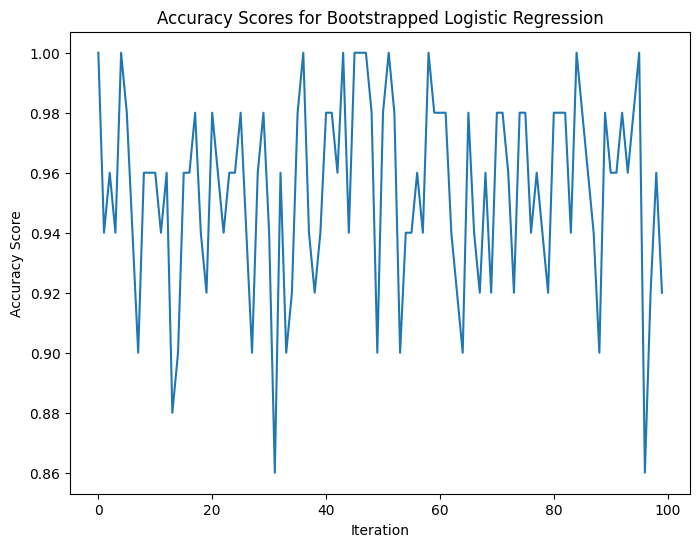

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np

n_bootstrap_samples = 50
n_iterations = 100
model = LogisticRegression()
model.fit(X_test, y_test)

accuracy_scores = []

for _ in range(n_iterations):
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)


    y_p = model.predict(X_resampled)

    accuracy = accuracy_score(y_resampled, y_p)
    accuracy_scores.append(accuracy)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped Logistic Regression")
plt.show()

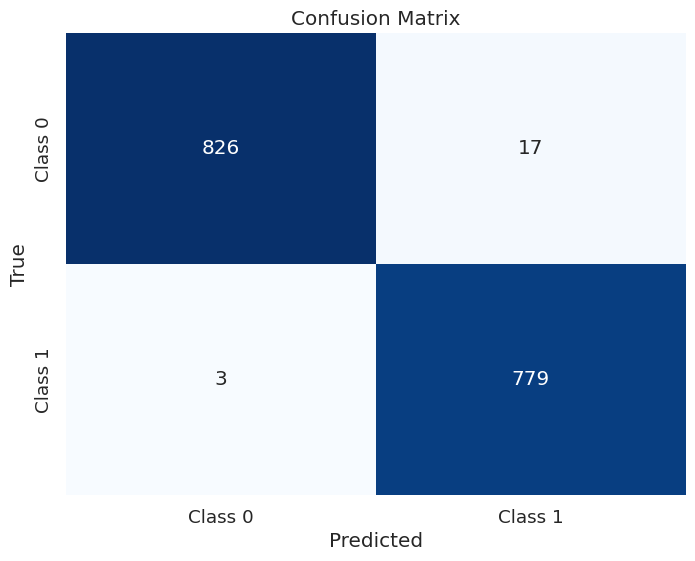

Accuracy: 0.9876923076923076
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       843
           1       0.98      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have defined x_train, y_train, x_test, and y_test somewhere in your code
# Split your data into training and testing sets


# Create an SVM instance and fit the training data
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for clarity
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
accuracy_SVM = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_SVM)
print(classification_report(y_test, y_pred))



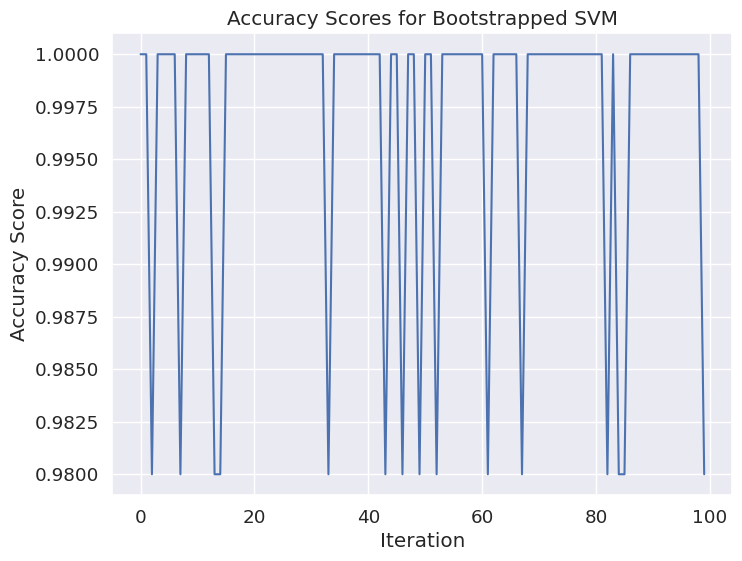

In [ ]:
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

n_bootstrap_samples = 50
n_iterations = 100

# Create an SVM model
model = SVC()

# Fit the SVM model to your test data (x_test, y_test)
model.fit(X_test, y_test)

accuracy_scores = []

for _ in range(n_iterations):
    # Resample the training data
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)

    # Predict using the SVM model
    y_p = model.predict(X_resampled)

    # Calculate accuracy score
    accuracy = accuracy_score(y_resampled, y_p)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped SVM")
plt.show()

In [ ]:
pip install xgboost

Accuracy: 1.0
Confusion Matrix:
[[843   0]
 [  0 782]]


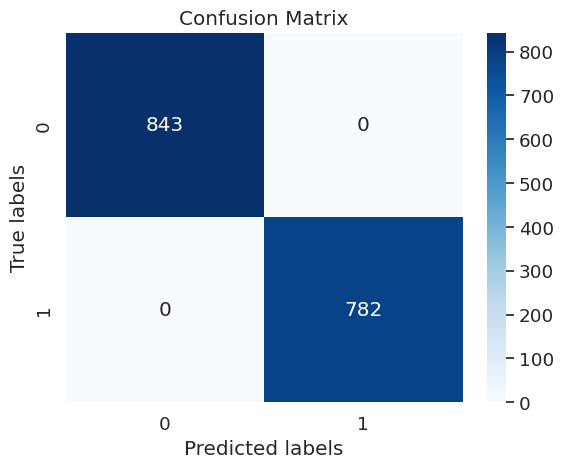

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model to the training data
model.fit(X_train, y_train)
# Predicting the Test set results
y_pred = model.predict(X_test)

# Evaluating the model
accuracy_XGB = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_XGB)
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


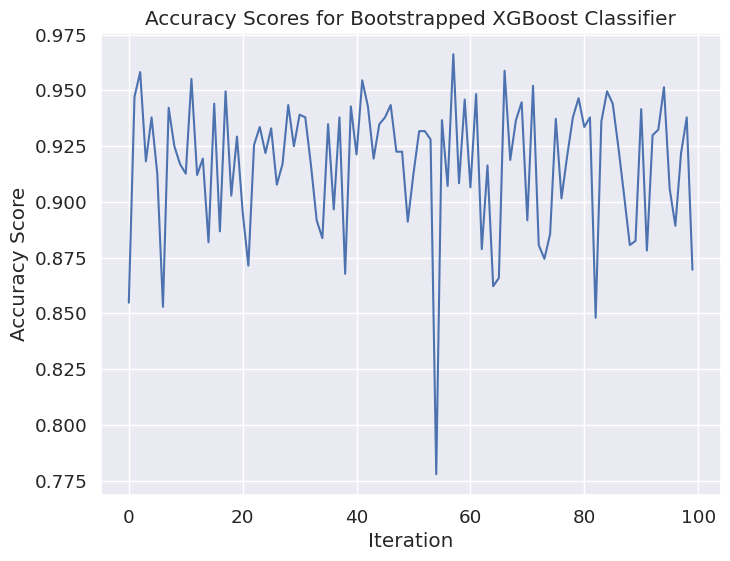

In [ ]:
import xgboost as xgb
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

n_bootstrap_samples = 50
n_iterations = 100

# Create an XGBoost classifier model
model = xgb.XGBClassifier()

accuracy_scores = []

for _ in range(n_iterations):
    # Resample the training data
    X_resampled, y_resampled = resample(X_train, y_train, n_samples=n_bootstrap_samples)

    # Fit the XGBoost classifier model to resampled data
    model.fit(X_resampled, y_resampled)

    # Predict using the XGBoost classifier model on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(range(n_iterations), accuracy_scores)
plt.xlabel("Iteration")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores for Bootstrapped XGBoost Classifier")
plt.show()


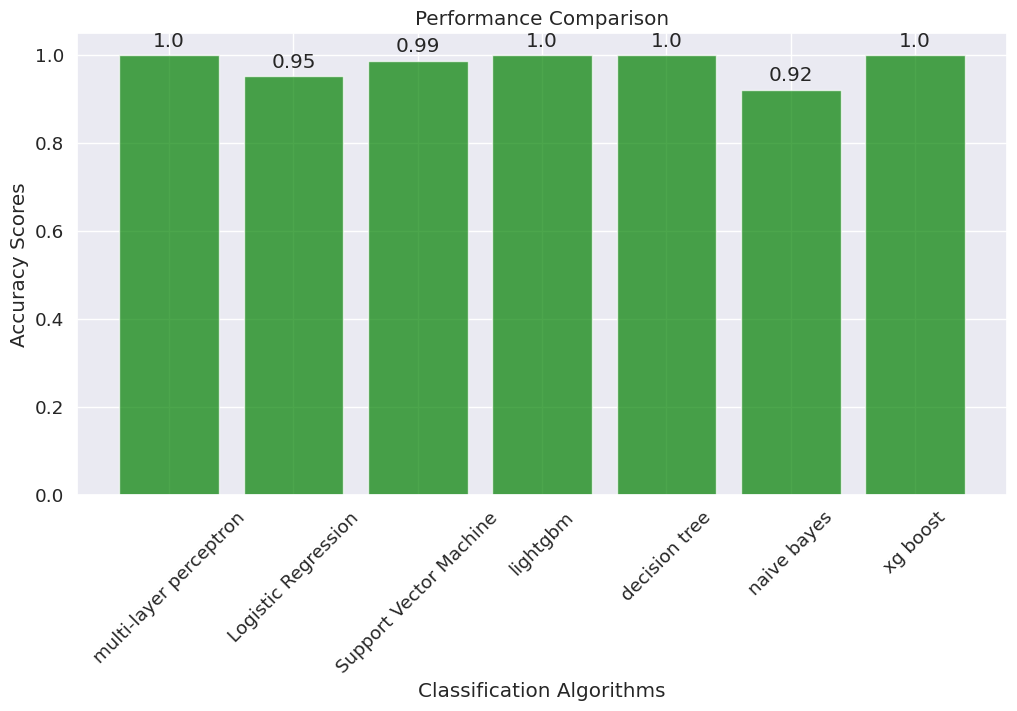

In [ ]:
import matplotlib.pyplot as plt

algorithm_names = ['multi-layer perceptron', 'Logistic Regression', 'Support Vector Machine','lightgbm','decision tree','naive bayes','xg boost']
accuracy_scores = [accuracy_MLP, accuracy_LR, accuracy_SVM,accuracy_LGBM,accuracy_DT,accuracy_NB,accuracy_XGB]

plt.figure(figsize=(12, 6))

# Bar chart for accuracy scores
plt.bar(algorithm_names, accuracy_scores, color='Green', alpha=0.7)
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy Scores')
plt.title('Performance Comparison')

# Adding data labels
for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


Confusion Matrix : 
 [[799  44]
 [ 34 748]]


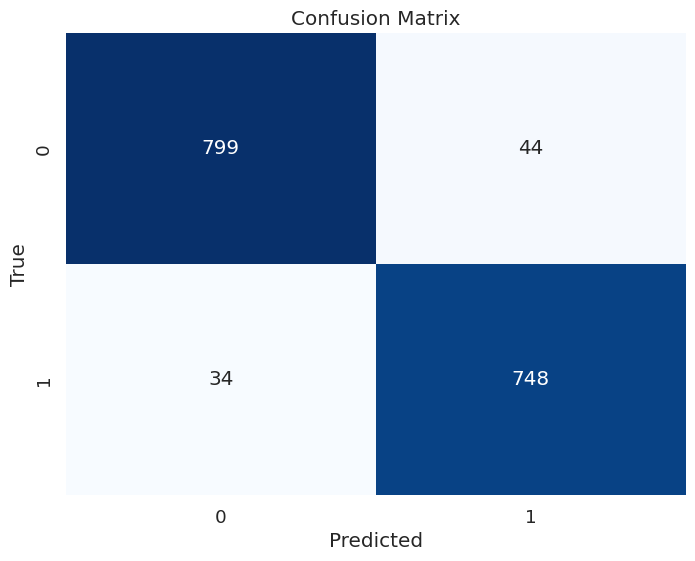

Accuracy: 0.952
Precision: 0.9520907029478458
Recall: 0.952
F1-score: 0.9520092796729673


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print precision
precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
print("Precision:", precision)

# Calculate and print recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate and print F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

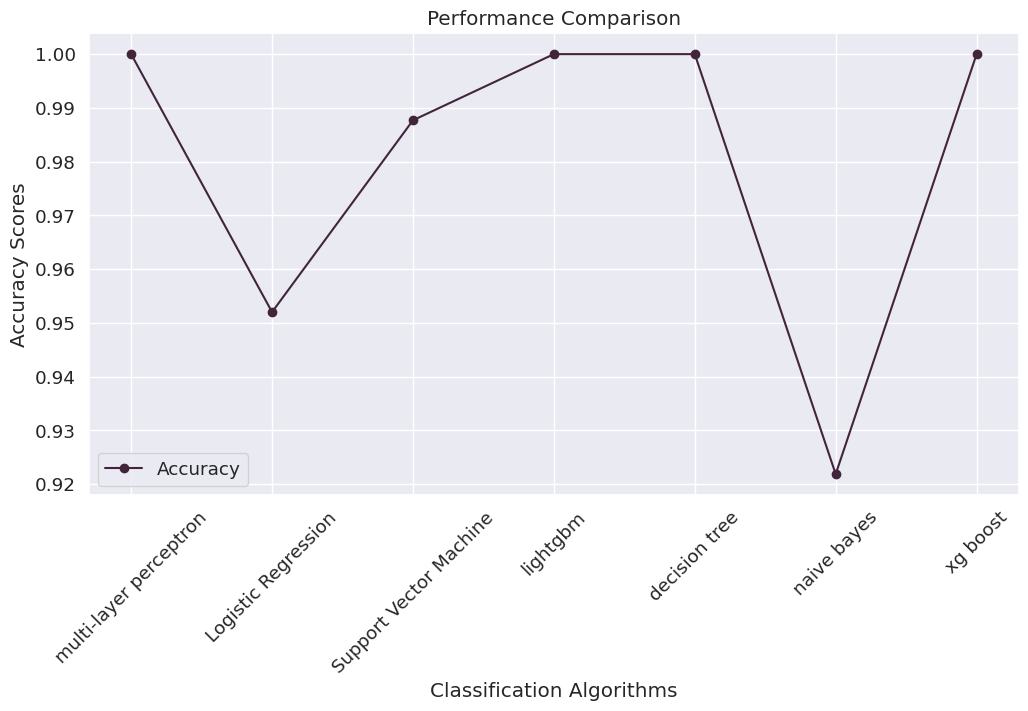

In [ ]:
algorithm_names = ['multi-layer perceptron', 'Logistic Regression', 'Support Vector Machine','lightgbm','decision tree','naive bayes','xg boost']
accuracy_scores = [accuracy_MLP, accuracy_LR, accuracy_SVM,accuracy_LGBM,accuracy_DT,accuracy_NB,accuracy_XGB]

plt.figure(figsize=(12, 6))
# Accuracy scores plot
plt.plot(algorithm_names, accuracy_scores, label = 'Accuracy', marker = 'o', color = '#42253B')
plt.xlabel( 'Classification Algorithms' )
plt.ylabel( 'Accuracy Scores' )
plt.title( 'Performance Comparison' )
# Adding a legend
plt.legend()

# Rotating the x-axis labels for better visibility
plt.xticks( rotation = 45 )

# Displaying the plot

plt.show ()
